자동 요인분석 기반 가중치 계산 시작...
데이터 로딩 중: /Users/ahnsaeyeon/guide-on/ai/store_unified_summary.csv
원본 데이터 크기: (975, 67)
컬럼 수: 67

변수 현황:
  사용 가능한 변수: 58개
  누락된 변수: 0개
  누락 변수 목록: []
데이터 전처리 중...
1. NaN과 무한값을 0으로 대체 중...
2. Boolean 컬럼 변환 중...
3. 역방향 지표 변환 중...
전처리 완료. 최종 데이터 크기: (975, 67)

자동 요인분석 수행 중...
분석 대상 변수: 58개

=== 전체 데이터 요인분석 가정 검증 ===
표본 수: 975, 변수 수: 58
표본/변수 비율: 16.81 (권장: 5 이상)
Bartlett 구형성 검정: chi2=318531.29, p-value=0.0000
  ✓ 구형성 귀무가설 기각 - 요인분석 적합
KMO 전체 적합도: 0.845
  ✓ 우수한 적합도 (≥0.7)

최적 요인 수 결정 중... (최대 15개)
  Kaiser 기준 요인 수: 11
  설명분산 70% 요인 수: 8
  선택된 최적 요인 수: 8
  최종 설명분산 비율: 0.712

8개 요인으로 요인분석 수행 중...
✓ 요인분석 완료
  최종 요인 수: 8
  총 설명분산 비율: 0.712

요인별 변수 그룹 생성 중... (임계값: 0.4)

Factor_1 (16개 변수):
  1. operating_expenses                    0.973
  2. cost_of_goods_sold                    0.972
  3. weekend_sales_amount                  0.972
  4. total_sales_amount                    0.971
  5. other_expenses                        0.970
  6. total_salary                         

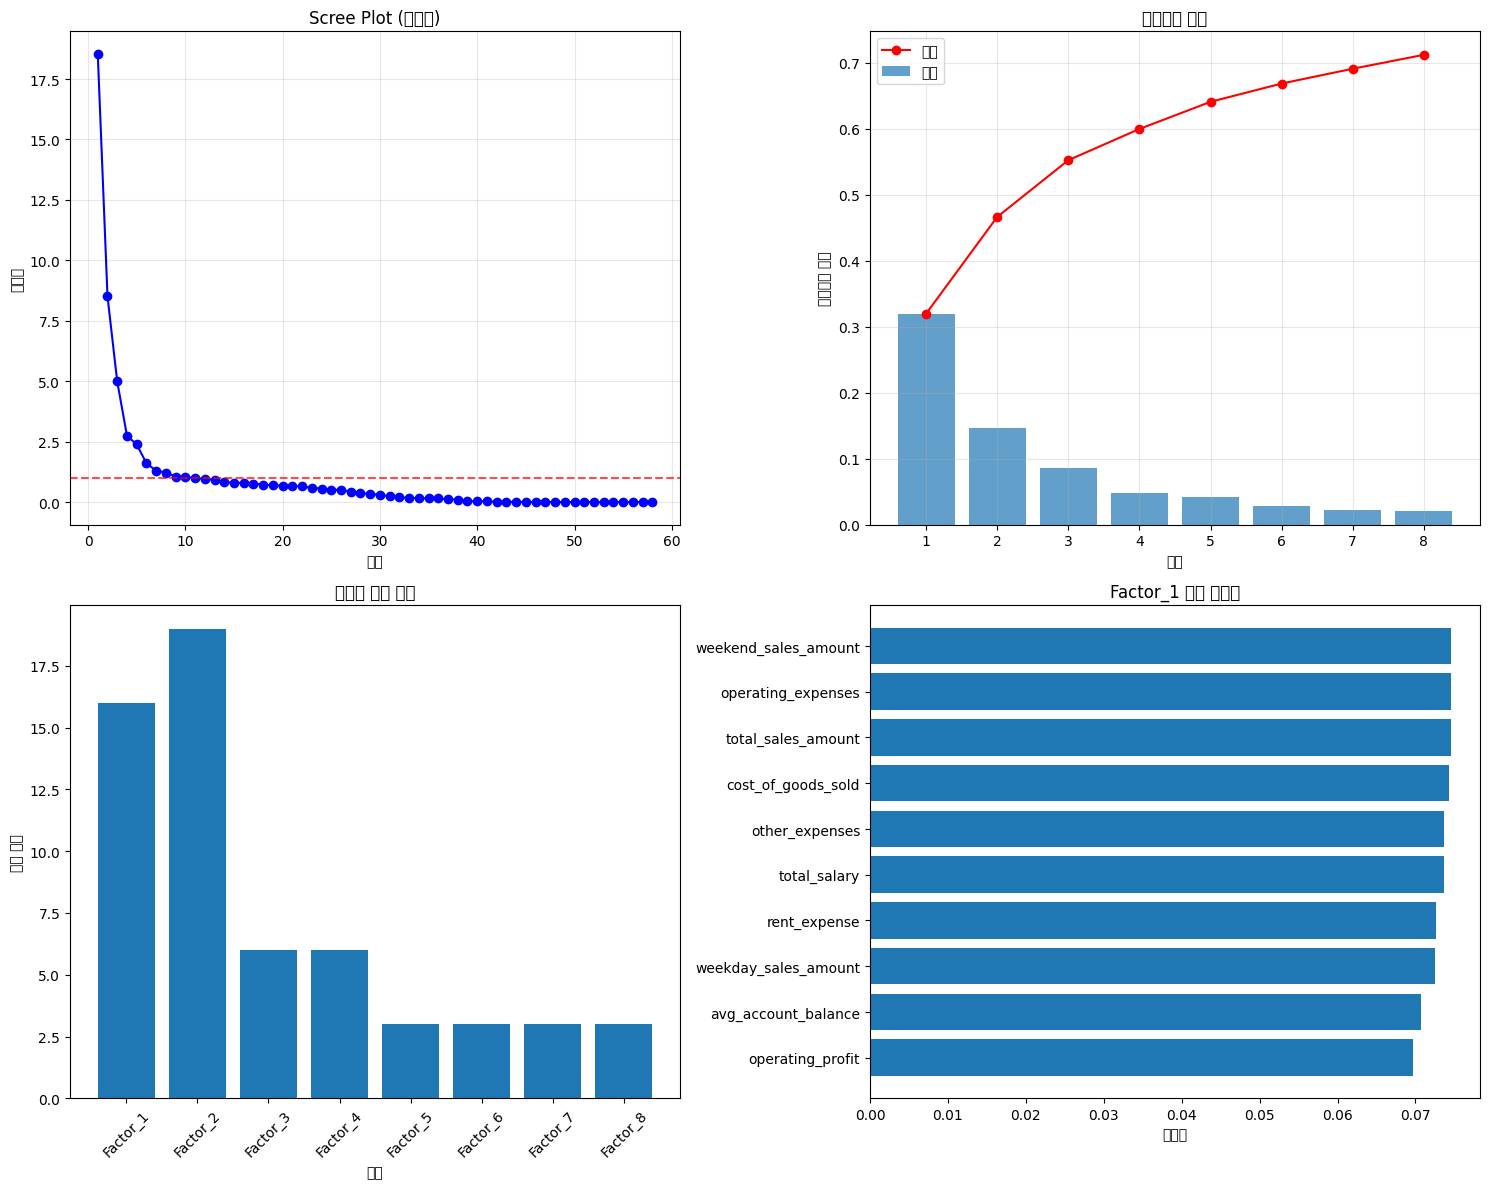

✓ 시각화 결과 저장: 'auto_factor_analysis_results.png'

자동 요인분석 결과 요약
총 분석 변수: 58개
추출된 요인: 8개
총 설명분산: 71.2%

Factor_1 (변수 16개):
  1. weekend_sales_amount: 0.0746
  2. operating_expenses: 0.0745
  3. total_sales_amount: 0.0745

Factor_2 (변수 19개):
  1. operating_profit_ratio: 0.0934
  2. operating_expense_ratio: 0.0934
  3. sales_cv: 0.0842

Factor_3 (변수 6개):
  1. weekend_avg_transaction_value: 0.2290
  2. weekday_avg_transaction_value: 0.2290
  3. avg_transaction_value: 0.2290

Factor_4 (변수 6개):
  1. electricity_usage_kwh: 0.1911
  2. food_waste_kg_per_day: 0.1874
  3. electricity_bill_amount: 0.1852

Factor_5 (변수 3개):
  1. cash_payment_ratio: 0.3648
  2. card_payment_ratio: 0.3648
  3. lunch_sales_ratio: 0.2703

Factor_6 (변수 3개):
  1. card_payment_ratio_detail: 0.3416
  2. cash_payment_ratio_detail: 0.3392
  3. weighted_avg_cash_period: 0.3192

Factor_7 (변수 3개):
  1. yellow_umbrella_member: 0.4848
  2. yellow_umbrella_amount: 0.3628
  3. yellow_umbrella_months: 0.1524

Factor_8 (변수 3개):
  1. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import warnings
warnings.filterwarnings('ignore')

class AutoFactorWeightCalculator:
    def __init__(self):
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.factor_results = {}
        self.factor_groups = {}  # 자동으로 생성된 요인 그룹
        self.weights = {}
        
        # 전체 변수 리스트 (그룹 구분 없이)
        self.all_variables = [
            'total_sales_amount', 'weekday_sales_amount', 'weekend_sales_amount',
            'lunch_sales_ratio', 'dinner_sales_ratio', 'transaction_count',
            'weekday_transaction_count', 'weekend_transaction_count',
            'mom_growth_rate', 'yoy_growth_rate', 'sales_cv',
            'avg_transaction_value', 'weekday_avg_transaction_value', 'weekend_avg_transaction_value',
            'cash_payment_ratio', 'card_payment_ratio', 'revisit_customer_sales_ratio', 'new_customer_ratio',
            'operating_profit', 'cost_of_goods_sold', 'total_salary', 'operating_expenses',
            'rent_expense', 'other_expenses', 'operating_profit_ratio', 'cogs_ratio',
            'salary_ratio', 'rent_ratio', 'operating_expense_ratio',
            'cash_payment_ratio_detail', 'card_payment_ratio_detail', 'other_payment_ratio',
            'weighted_avg_cash_period', 'cashflow_cv', 'avg_account_balance',
            'min_balance_maintenance_ratio', 'excessive_withdrawal_frequency',
            'rent_payment_compliance_rate', 'utility_payment_compliance_rate',
            'salary_payment_regularity', 'tax_payment_integrity',
            'electricity_usage_kwh', 'electricity_bill_amount', 'gas_usage_m3', 'water_usage_ton',
            'energy_eff_appliance_ratio', 'participate_energy_eff_support', 
            'participate_high_eff_equip_support', 'food_waste_kg_per_day', 'recycle_waste_kg_per_day',
            'yellow_umbrella_member', 'yellow_umbrella_months', 'yellow_umbrella_amount',
            'employment_insurance_employees', 'customer_review_avg_rating', 
            'customer_review_positive_ratio', 'hygiene_certified', 'origin_price_violation_count'
        ]
        
        # 역방향 지표 (낮을수록 좋은 지표)
        self.reverse_indicators = [
            'sales_cv', 'cashflow_cv', 'cogs_ratio', 'rent_ratio', 'operating_expense_ratio',
            'weighted_avg_cash_period', 'excessive_withdrawal_frequency',
            'electricity_usage_kwh', 'electricity_bill_amount', 'gas_usage_m3', 
            'water_usage_ton', 'food_waste_kg_per_day', 'origin_price_violation_count'
        ]
    
    def load_and_preprocess_data(self, csv_file_path):
        """CSV 파일 로드 및 전처리"""
        print(f"데이터 로딩 중: {csv_file_path}")
        
        try:
            df = pd.read_csv(csv_file_path, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='cp949')

        print(f"원본 데이터 크기: {df.shape}")
        print(f"컬럼 수: {len(df.columns)}")
        
        # 사용 가능한 변수만 필터링
        self.available_variables = [col for col in self.all_variables if col in df.columns]
        missing_vars = [col for col in self.all_variables if col not in df.columns]
        
        print(f"\n변수 현황:")
        print(f"  사용 가능한 변수: {len(self.available_variables)}개")
        print(f"  누락된 변수: {len(missing_vars)}개")
        if len(missing_vars) <= 10:  # 누락 변수가 적으면 출력
            print(f"  누락 변수 목록: {missing_vars}")
        
        # 전처리
        df_processed = self._preprocess_data(df)
        
        return df_processed
    
    def _preprocess_data(self, df):
        """데이터 전처리"""
        df_processed = df.copy()
        
        print("데이터 전처리 중...")
        
        # 1. 모든 NaN과 무한값을 0으로 대체
        print("1. NaN과 무한값을 0으로 대체 중...")
        df_processed = df_processed.replace([np.inf, -np.inf, np.nan], 0)
        
        # 2. Boolean 컬럼을 0/1로 변환
        print("2. Boolean 컬럼 변환 중...")
        boolean_cols = ['yellow_umbrella_member', 'participate_energy_eff_support', 
                       'participate_high_eff_equip_support', 'hygiene_certified']
        for col in boolean_cols:
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].astype(int)
        
        # 3. 역방향 지표 변환 (낮을수록 좋은 지표를 높을수록 좋게 변환)
        print("3. 역방향 지표 변환 중...")
        for col in self.reverse_indicators:
            if col in df_processed.columns:
                max_val = df_processed[col].max()
                min_val = df_processed[col].min()
                if max_val != min_val:
                    df_processed[col] = max_val - df_processed[col] + min_val
        
        print(f"전처리 완료. 최종 데이터 크기: {df_processed.shape}")
        return df_processed
    
    def check_factor_analysis_assumptions(self, data):
        """요인분석 가정 검증"""
        print(f"\n=== 전체 데이터 요인분석 가정 검증 ===")
        
        # 1. 표본 크기 확인
        n_samples, n_features = data.shape
        print(f"표본 수: {n_samples}, 변수 수: {n_features}")
        print(f"표본/변수 비율: {n_samples/n_features:.2f} (권장: 5 이상)")
        
        # 2. Bartlett's 구형성 검정
        try:
            chi_square_value, p_value = calculate_bartlett_sphericity(data)
            print(f"Bartlett 구형성 검정: chi2={chi_square_value:.2f}, p-value={p_value:.4f}")
            if p_value < 0.05:
                print("  ✓ 구형성 귀무가설 기각 - 요인분석 적합")
            else:
                print("  ✗ 구형성 귀무가설 채택 - 요인분석 부적합")
        except:
            print("  Bartlett 검정 실행 불가")
        
        # 3. KMO 표본적합도 검정
        try:
            kmo_all, kmo_model = calculate_kmo(data)
            print(f"KMO 전체 적합도: {kmo_model:.3f}")
            if kmo_model >= 0.7:
                print("  ✓ 우수한 적합도 (≥0.7)")
            elif kmo_model >= 0.6:
                print("  ○ 적당한 적합도 (0.6-0.7)")
            else:
                print("  ✗ 부적합한 적합도 (<0.6)")
        except:
            print("  KMO 검정 실행 불가")
        
        return True
    
    def determine_optimal_factors(self, data, max_factors=None):
        """최적 요인 수 결정"""
        n_variables = data.shape[1]
        max_factors = max_factors or min(n_variables, 15)  # 최대 15개 요인까지
        
        print(f"\n최적 요인 수 결정 중... (최대 {max_factors}개)")
        
        eigenvalues_list = []
        explained_variance_list = []
        
        # 다양한 요인 수로 분석
        for n_factors in range(1, max_factors + 1):
            try:
                fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
                fa.fit(data)
                eigenvalues = fa.get_eigenvalues()[0]
                eigenvalues_list.append(eigenvalues)
                
                # 설명분산 비율 계산
                explained_variance = np.sum(eigenvalues[:n_factors]) / len(eigenvalues)
                explained_variance_list.append(explained_variance)
                
            except Exception as e:
                print(f"  요인 수 {n_factors}에서 오류: {str(e)}")
                break
        
        if not eigenvalues_list:
            return 3  # 기본값
        
        # Kaiser 기준 (고유값 > 1)
        final_eigenvalues = eigenvalues_list[-1] if eigenvalues_list else np.array([1])
        kaiser_factors = np.sum(final_eigenvalues > 1)
        
        # 설명분산 70% 이상인 최소 요인 수
        variance_70_factors = next((i+1 for i, var in enumerate(explained_variance_list) if var >= 0.7), len(explained_variance_list))
        
        # 최적 요인 수 결정 (Kaiser + 설명분산 고려)
        optimal_factors = max(3, min(kaiser_factors, variance_70_factors, n_variables // 3))
        
        print(f"  Kaiser 기준 요인 수: {kaiser_factors}")
        print(f"  설명분산 70% 요인 수: {variance_70_factors}")
        print(f"  선택된 최적 요인 수: {optimal_factors}")
        print(f"  최종 설명분산 비율: {explained_variance_list[optimal_factors-1]:.3f}")
        
        return optimal_factors
    
    def perform_factor_analysis(self, df):
        """전체 변수에 대한 요인분석 수행"""
        print("\n" + "="*60)
        print("자동 요인분석 수행 중...")
        print("="*60)
        
        # 사용 가능한 변수로 데이터 추출
        analysis_data = df[self.available_variables].copy()
        
        print(f"분석 대상 변수: {len(self.available_variables)}개")
        
        # 결측치 처리
        analysis_data_filled = pd.DataFrame(
            self.imputer.fit_transform(analysis_data), 
            columns=self.available_variables
        )
        
        # 표준화
        analysis_data_scaled = self.scaler.fit_transform(analysis_data_filled)
        
        # 가정 검증
        self.check_factor_analysis_assumptions(analysis_data_scaled)
        
        # 최적 요인 수 결정
        optimal_factors = self.determine_optimal_factors(analysis_data_scaled)
        
        # 요인분석 수행
        print(f"\n{optimal_factors}개 요인으로 요인분석 수행 중...")
        fa = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
        fa.fit(analysis_data_scaled)
        
        # 결과 저장
        loadings = fa.loadings_
        eigenvalues = fa.get_eigenvalues()[0]
        communalities = fa.get_communalities()
        
        self.factor_results = {
            'factor_analyzer': fa,
            'loadings': loadings,
            'eigenvalues': eigenvalues,
            'communalities': communalities,
            'variables': self.available_variables,
            'n_factors': optimal_factors,
            'explained_variance': np.sum(eigenvalues[:optimal_factors]) / len(eigenvalues)
        }
        
        print(f"✓ 요인분석 완료")
        print(f"  최종 요인 수: {optimal_factors}")
        print(f"  총 설명분산 비율: {self.factor_results['explained_variance']:.3f}")
        
        return self.factor_results
    
    def create_factor_groups(self, loading_threshold=0.4):
        """요인별로 변수 그룹 생성"""
        print(f"\n요인별 변수 그룹 생성 중... (임계값: {loading_threshold})")
        
        loadings = self.factor_results['loadings']
        variables = self.factor_results['variables']
        n_factors = self.factor_results['n_factors']
        
        self.factor_groups = {}
        
        for factor_idx in range(n_factors):
            factor_name = f"Factor_{factor_idx + 1}"
            
            # 해당 요인에 높은 적재량을 가진 변수들 찾기
            high_loading_vars = []
            for var_idx, var_name in enumerate(variables):
                loading_value = abs(loadings[var_idx, factor_idx])
                if loading_value >= loading_threshold:
                    high_loading_vars.append({
                        'variable': var_name,
                        'loading': loadings[var_idx, factor_idx],
                        'abs_loading': loading_value
                    })
            
            # 적재량 순으로 정렬
            high_loading_vars.sort(key=lambda x: x['abs_loading'], reverse=True)
            
            if high_loading_vars:
                self.factor_groups[factor_name] = high_loading_vars
                print(f"\n{factor_name} ({len(high_loading_vars)}개 변수):")
                for i, var_info in enumerate(high_loading_vars[:10]):  # 상위 10개만 출력
                    print(f"  {i+1}. {var_info['variable']:<35} {var_info['loading']:>7.3f}")
                if len(high_loading_vars) > 10:
                    print(f"  ... 총 {len(high_loading_vars)}개 변수")
        
        print(f"\n✓ {len(self.factor_groups)}개 요인 그룹 생성 완료")
        return self.factor_groups
    
    def calculate_factor_weights(self):
        """각 요인 그룹 내 변수들의 가중치 계산"""
        print("\n" + "="*60)
        print("요인별 가중치 계산 중...")
        print("="*60)
        
        communalities = self.factor_results['communalities']
        variables = self.factor_results['variables']
        
        # 변수명-인덱스 매핑
        var_to_idx = {var: idx for idx, var in enumerate(variables)}
        
        for factor_name, var_list in self.factor_groups.items():
            print(f"\n{factor_name} 가중치 계산:")
            
            # 각 변수의 가중치 계산 (적재량 × 공통성)
            factor_weights = {}
            total_weight = 0
            
            for var_info in var_list:
                var_name = var_info['variable']
                loading = var_info['abs_loading']  # 절댓값 사용
                
                if var_name in var_to_idx:
                    var_idx = var_to_idx[var_name]
                    communality = communalities[var_idx]
                    
                    # 가중치 = 적재량 × 공통성
                    weight = loading * communality
                    factor_weights[var_name] = weight
                    total_weight += weight
            
            # 정규화 (그룹 내 합이 1이 되도록)
            if total_weight > 0:
                for var_name in factor_weights:
                    factor_weights[var_name] = factor_weights[var_name] / total_weight
            
            self.weights[factor_name] = factor_weights
            
            # 상위 가중치 출력
            sorted_weights = sorted(factor_weights.items(), key=lambda x: x[1], reverse=True)
            for i, (var, weight) in enumerate(sorted_weights[:10]):
                print(f"  {i+1:2d}. {var:<35} {weight:.4f}")
            if len(sorted_weights) > 10:
                print(f"  ... 총 {len(sorted_weights)}개 변수")
        
        return self.weights
    
    def interpret_factors(self):
        """요인별 의미 해석"""
        print("\n" + "="*60)
        print("요인 해석")
        print("="*60)
        
        for factor_name, var_list in self.factor_groups.items():
            print(f"\n{factor_name}:")
            
            # 상위 변수들의 공통 특성 파악
            top_vars = [var_info['variable'] for var_info in var_list[:5]]
            
            # 간단한 키워드 기반 해석
            keywords = {
                'sales': ['매출', '판매'],
                'profit': ['수익성', '이익'],
                'cost': ['비용', '지출'],
                'payment': ['결제', '납부'],
                'customer': ['고객', '서비스'],
                'environment': ['환경', '에너지'],
                'compliance': ['준수', '성실']
            }
            
            factor_keywords = []
            for var in top_vars:
                var_lower = var.lower()
                if any(word in var_lower for word in ['sales', 'amount', 'transaction']):
                    factor_keywords.append('매출관련')
                elif any(word in var_lower for word in ['profit', 'operating']):
                    factor_keywords.append('수익성')
                elif any(word in var_lower for word in ['cost', 'expense', 'ratio']):
                    factor_keywords.append('비용구조')
                elif any(word in var_lower for word in ['payment', 'compliance']):
                    factor_keywords.append('납부성실')
                elif any(word in var_lower for word in ['customer', 'review']):
                    factor_keywords.append('고객만족')
                elif any(word in var_lower for word in ['energy', 'electric', 'environment']):
                    factor_keywords.append('환경경영')
            
            # 가장 빈번한 키워드 찾기
            if factor_keywords:
                most_common = max(set(factor_keywords), key=factor_keywords.count)
                print(f"  해석: {most_common} 관련 요인")
            
            print(f"  주요 변수: {', '.join(top_vars)}")
    
    def save_results(self, output_file='auto_factor_weights'):
        """결과 저장"""
        print(f"\n결과 저장 중: {output_file}")
        
        try:
            # Excel로 저장 시도
            with pd.ExcelWriter(f'{output_file}.xlsx', engine='openpyxl') as writer:
                
                # 1. 요인별 가중치 요약
                summary_data = []
                for factor_name, factor_weights in self.weights.items():
                    for var, weight in factor_weights.items():
                        summary_data.append({
                            '요인': factor_name,
                            '변수명': var,
                            '가중치': weight,
                            '순위': 0
                        })
                
                summary_df = pd.DataFrame(summary_data)
                
                # 요인별 순위 계산
                for factor in summary_df['요인'].unique():
                    mask = summary_df['요인'] == factor
                    summary_df.loc[mask, '순위'] = summary_df.loc[mask, '가중치'].rank(ascending=False)
                
                summary_df.to_excel(writer, sheet_name='요인별_가중치', index=False)
                
                # 2. 요인 적재량 매트릭스
                loadings_df = pd.DataFrame(
                    self.factor_results['loadings'],
                    index=self.factor_results['variables'],
                    columns=[f'Factor_{i+1}' for i in range(self.factor_results['n_factors'])]
                )
                loadings_df['공통성'] = self.factor_results['communalities']
                loadings_df.to_excel(writer, sheet_name='요인적재량')
                
                # 3. 요인별 설명분산
                eigenvalues = self.factor_results['eigenvalues'][:self.factor_results['n_factors']]
                factor_summary = pd.DataFrame({
                    '요인': [f'Factor_{i+1}' for i in range(len(eigenvalues))],
                    '고유값': eigenvalues,
                    '설명분산비율': eigenvalues / len(self.factor_results['variables']),
                    '누적설명분산': np.cumsum(eigenvalues) / len(self.factor_results['variables'])
                })
                factor_summary.to_excel(writer, sheet_name='요인요약', index=False)
            
            print(f"✓ Excel 결과 저장: {output_file}.xlsx")
            
        except ImportError:
            # openpyxl 없으면 CSV로 저장
            print("openpyxl이 없어 CSV로 저장합니다...")
            
            summary_data = []
            for factor_name, factor_weights in self.weights.items():
                for var, weight in factor_weights.items():
                    summary_data.append({
                        '요인': factor_name,
                        '변수명': var,
                        '가중치': weight
                    })
            
            summary_df = pd.DataFrame(summary_data)
            summary_df.to_csv(f'{output_file}_가중치.csv', index=False, encoding='utf-8-sig')
            print(f"✓ CSV 결과 저장: {output_file}_가중치.csv")
    
    def visualize_results(self):
        """결과 시각화"""
        n_factors = self.factor_results['n_factors']
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. 고유값 그래프 (Scree plot)
        eigenvalues = self.factor_results['eigenvalues']
        axes[0,0].plot(range(1, len(eigenvalues)+1), eigenvalues, 'bo-')
        axes[0,0].axhline(y=1, color='r', linestyle='--', alpha=0.7)
        axes[0,0].set_title('Scree Plot (고유값)')
        axes[0,0].set_xlabel('요인')
        axes[0,0].set_ylabel('고유값')
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. 설명분산 비율
        explained_var = eigenvalues[:n_factors] / len(eigenvalues)
        cumulative_var = np.cumsum(explained_var)
        
        axes[0,1].bar(range(1, n_factors+1), explained_var, alpha=0.7, label='개별')
        axes[0,1].plot(range(1, n_factors+1), cumulative_var, 'ro-', label='누적')
        axes[0,1].set_title('설명분산 비율')
        axes[0,1].set_xlabel('요인')
        axes[0,1].set_ylabel('설명분산 비율')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # 3. 요인별 변수 수
        factor_sizes = [len(vars_list) for vars_list in self.factor_groups.values()]
        factor_names = list(self.factor_groups.keys())
        
        axes[1,0].bar(factor_names, factor_sizes)
        axes[1,0].set_title('요인별 변수 개수')
        axes[1,0].set_xlabel('요인')
        axes[1,0].set_ylabel('변수 개수')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # 4. 첫 번째 요인의 상위 변수 가중치
        if self.weights:
            first_factor = list(self.weights.keys())[0]
            top_weights = sorted(self.weights[first_factor].items(), 
                               key=lambda x: x[1], reverse=True)[:10]
            
            variables = [item[0] for item in top_weights]
            weights = [item[1] for item in top_weights]
            
            axes[1,1].barh(range(len(variables)), weights)
            axes[1,1].set_yticks(range(len(variables)))
            axes[1,1].set_yticklabels([v[:20] + '...' if len(v) > 20 else v for v in variables])
            axes[1,1].set_title(f'{first_factor} 상위 가중치')
            axes[1,1].set_xlabel('가중치')
            axes[1,1].invert_yaxis()
        
        plt.tight_layout()
        plt.savefig('auto_factor_analysis_results.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✓ 시각화 결과 저장: 'auto_factor_analysis_results.png'")


def run_auto_factor_analysis(csv_file_path):
    """자동 요인분석 실행"""
    
    print("자동 요인분석 기반 가중치 계산 시작...")
    print("=" * 60)
    
    # 1. 분석기 생성
    calculator = AutoFactorWeightCalculator()
    
    # 2. 데이터 로드 및 전처리
    df = calculator.load_and_preprocess_data(csv_file_path)
    
    # 3. 요인분석 수행
    factor_results = calculator.perform_factor_analysis(df)
    
    # 4. 요인별 변수 그룹 생성
    factor_groups = calculator.create_factor_groups()
    
    # 5. 가중치 계산
    weights = calculator.calculate_factor_weights()
    
    # 6. 요인 해석
    calculator.interpret_factors()
    
    # 7. 결과 저장
    calculator.save_results('자동요인분석_가중치결과')
    
    # 8. 시각화
    calculator.visualize_results()
    
    # 9. 최종 요약
    print("\n" + "="*60)
    print("자동 요인분석 결과 요약")
    print("="*60)
    
    print(f"총 분석 변수: {len(calculator.available_variables)}개")
    print(f"추출된 요인: {len(factor_groups)}개")
    print(f"총 설명분산: {factor_results['explained_variance']:.1%}")
    
    for factor_name, factor_weights in weights.items():
        top_3 = sorted(factor_weights.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"\n{factor_name} (변수 {len(factor_weights)}개):")
        for i, (var, weight) in enumerate(top_3, 1):
            print(f"  {i}. {var}: {weight:.4f}")
    
    return calculator, weights

# 실행
if __name__ == "__main__":
    csv_file_path = "/Users/ahnsaeyeon/guide-on/ai/store_unified_summary.csv"
    
    try:
        calculator, weights = run_auto_factor_analysis(csv_file_path)
        print("\n✓ 자동 요인분석 완료!")
        print("✓ 결과 파일: '자동요인분석_가중치결과.xlsx'")
        print("✓ 시각화 파일: 'auto_factor_analysis_results.png'")
        
    except Exception as e:
        print(f"❌ 분석 중 오류: {str(e)}")
        import traceback
        traceback.print_exc()
    

In [6]:
import pandas as pd
import numpy as np
import json

class FactorCreditScorer:
    def __init__(self):
        """요인분석 기반 신용점수 계산기"""
        
        # 요인별 가중치 (앞서 분석 결과)
        self.factor_weights = {
            'Factor_1': {
                'operating_expenses': 0.074535,
                'cost_of_goods_sold': 0.07436,
                'weekend_sales_amount': 0.074554,
                'total_sales_amount': 0.07453,
                'other_expenses': 0.073679,
                'total_salary': 0.0736,
                'rent_expense': 0.072611,
                'weekday_sales_amount': 0.072501,
                'avg_account_balance': 0.07072,
                'operating_profit': 0.069715,
                'weekday_transaction_count': 0.066501,
                'transaction_count': 0.063799,
                'weekend_transaction_count': 0.057164,
                'water_usage_ton': 0.025919,
                'electricity_bill_amount': 0.027752,
                'electricity_usage_kwh': 0.028061
            },
            'Factor_2': {
                'revisit_customer_sales_ratio': 0.083268,
                'sales_cv': 0.084229,
                'new_customer_ratio': 0.078371,
                'operating_profit_ratio': 0.093389,
                'operating_expense_ratio': 0.093389,
                'energy_eff_appliance_ratio': 0.04497,
                'cogs_ratio': 0.049744,
                'customer_review_avg_rating': 0.056357,
                'rent_payment_compliance_rate': 0.025489,
                'card_payment_ratio': 0.057726,
                'cash_payment_ratio': 0.057712,
                'salary_payment_regularity': 0.022855,
                'customer_review_positive_ratio': 0.034197,
                'min_balance_maintenance_ratio': 0.021572,
                'weighted_avg_cash_period': 0.056587,
                'cash_payment_ratio_detail': 0.058045,
                'card_payment_ratio_detail': 0.057432,
                'tax_payment_integrity': 0.012474,
                'cashflow_cv': 0.012193
            },
            'Factor_3': {
                'weekend_avg_transaction_value': 0.229004,
                'weekday_avg_transaction_value': 0.229004,
                'avg_transaction_value': 0.229004,
                'dinner_sales_ratio': 0.131089,
                'lunch_sales_ratio': 0.087794,
                'food_waste_kg_per_day': 0.094106
            },
            'Factor_4': {
                'electricity_usage_kwh': 0.191075,
                'food_waste_kg_per_day': 0.187428,
                'electricity_bill_amount': 0.185198,
                'water_usage_ton': 0.163306,
                'recycle_waste_kg_per_day': 0.160769,
                'gas_usage_m3': 0.112225
            },
            'Factor_5': {
                'cash_payment_ratio': 0.364838,
                'card_payment_ratio': 0.364834,
                'lunch_sales_ratio': 0.270328
            },
            'Factor_6': {
                'card_payment_ratio_detail': 0.341636,
                'cash_payment_ratio_detail': 0.339214,
                'weighted_avg_cash_period': 0.31915
            },
            'Factor_7': {
                'yellow_umbrella_member': 0.484789,
                'yellow_umbrella_amount': 0.362795,
                'yellow_umbrella_months': 0.152416
            },
            'Factor_8': {
                'operating_profit_ratio': 0.435107,
                'operating_expense_ratio': 0.435107,
                'salary_ratio': 0.129785
            }
        }
        
        # 요인별 중요도 (동등하게 설정, 필요시 조정 가능)
        self.factor_importance = {
            'Factor_1': 0.20,  # 사업 규모 (20%)
            'Factor_2': 0.15,  # 운영 효율성 (15%)
            'Factor_3': 0.25,  # 객단가 (25%) - 수익성 핵심
            'Factor_4': 0.10,  # 환경 자원 (10%)
            'Factor_5': 0.05,  # 결제 방식 (5%)
            'Factor_6': 0.10,  # 현금흐름 관리 (10%)
            'Factor_7': 0.10,  # 노란우산 공제 (10%)
            'Factor_8': 0.05   # 수익성 집중 (5%)
        }
        
        # 역방향 지표 (낮을수록 좋은 지표들)
        self.reverse_indicators = {
            'sales_cv', 'cashflow_cv', 'cogs_ratio', 'rent_ratio', 'operating_expense_ratio',
            'weighted_avg_cash_period', 'electricity_usage_kwh', 'electricity_bill_amount', 
            'gas_usage_m3', 'water_usage_ton', 'food_waste_kg_per_day', 'origin_price_violation_count'
        }
        
        # 통계 정보 (정규화용) - 실제 데이터 분포 기반으로 설정
        self.stats = self._set_default_stats()
    
    def _set_default_stats(self):
        """기본 통계 정보 설정 (실제 데이터 분포 추정치)"""
        return {
            # 매출 관련
            'total_sales_amount': {'min': 0, 'max': 100000000, 'q25': 10000000, 'q75': 50000000},
            'weekend_sales_amount': {'min': 0, 'max': 50000000, 'q25': 5000000, 'q75': 25000000},
            'weekday_sales_amount': {'min': 0, 'max': 80000000, 'q25': 8000000, 'q75': 40000000},
            
            # 거래 관련
            'transaction_count': {'min': 0, 'max': 10000, 'q25': 100, 'q75': 1000},
            'avg_transaction_value': {'min': 0, 'max': 100000, 'q25': 10000, 'q75': 50000},
            'weekend_avg_transaction_value': {'min': 0, 'max': 100000, 'q25': 10000, 'q75': 50000},
            'weekday_avg_transaction_value': {'min': 0, 'max': 100000, 'q25': 10000, 'q75': 50000},
            
            # 비율 지표 (%)
            'operating_profit_ratio': {'min': -50, 'max': 50, 'q25': 5, 'q75': 20},
            'lunch_sales_ratio': {'min': 0, 'max': 100, 'q25': 20, 'q75': 40},
            'dinner_sales_ratio': {'min': 0, 'max': 100, 'q25': 20, 'q75': 40},
            'cash_payment_ratio': {'min': 0, 'max': 100, 'q25': 20, 'q75': 60},
            'card_payment_ratio': {'min': 0, 'max': 100, 'q25': 40, 'q75': 80},
            'energy_eff_appliance_ratio': {'min': 0, 'max': 100, 'q25': 20, 'q75': 60},
            'customer_review_avg_rating': {'min': 1, 'max': 5, 'q25': 3.5, 'q75': 4.5},
            'customer_review_positive_ratio': {'min': 0, 'max': 100, 'q25': 60, 'q75': 85},
            
            # 비용 관련
            'operating_expenses': {'min': 0, 'max': 50000000, 'q25': 2000000, 'q75': 10000000},
            'cost_of_goods_sold': {'min': 0, 'max': 60000000, 'q25': 3000000, 'q75': 15000000},
            'rent_expense': {'min': 0, 'max': 5000000, 'q25': 500000, 'q75': 2000000},
            
            # 환경 관련
            'electricity_usage_kwh': {'min': 0, 'max': 5000, 'q25': 500, 'q75': 2000},
            'gas_usage_m3': {'min': 0, 'max': 2000, 'q25': 200, 'q75': 800},
            'water_usage_ton': {'min': 0, 'max': 100, 'q25': 5, 'q75': 20},
            'food_waste_kg_per_day': {'min': 0, 'max': 50, 'q25': 3, 'q75': 15},
            
            # 노란우산
            'yellow_umbrella_amount': {'min': 0, 'max': 500000, 'q25': 0, 'q75': 200000},
            'yellow_umbrella_months': {'min': 0, 'max': 60, 'q25': 0, 'q75': 24}
        }
    
    def normalize_value(self, variable, value):
        """변수값을 0-100점으로 정규화"""
        if pd.isna(value) or np.isinf(value):
            return 0
        
        value = float(value)
        
        # 역방향 지표 처리
        if variable in self.reverse_indicators:
            # 낮을수록 좋은 지표는 역변환
            if variable in self.stats:
                stats = self.stats[variable]
                max_val = stats['q75'] * 2  # 상위 25% * 2를 최대값으로
                # 값이 클수록 점수가 낮아짐
                if value >= max_val:
                    return 0
                else:
                    return max(0, min(100, 100 * (1 - value / max_val)))
            else:
                # 기본 역변환
                return max(0, min(100, 100 * (1 - min(value / 100, 1))))
        
        # 정방향 지표 처리
        if variable in self.stats:
            stats = self.stats[variable]
            q25, q75 = stats['q25'], stats['q75']
            
            if value <= q25:
                return 25
            elif value >= q75:
                return 75
            else:
                # 25-75% 구간을 25-75점으로 선형 매핑
                return 25 + 50 * (value - q25) / (q75 - q25)
        else:
            # 기본 정규화 (비율 지표)
            if 0 <= value <= 100:
                return value
            else:
                return max(0, min(100, value))
    
    def calculate_factor_score(self, factor_name, input_data):
        """특정 요인의 점수 계산"""
        if factor_name not in self.factor_weights:
            return 50  # 기본값
        
        factor_vars = self.factor_weights[factor_name]
        weighted_sum = 0
        total_weight = 0
        
        for variable, weight in factor_vars.items():
            if variable in input_data:
                value = input_data[variable]
                normalized_value = self.normalize_value(variable, value)
                weighted_sum += normalized_value * weight
                total_weight += weight
        
        if total_weight > 0:
            factor_score = weighted_sum / total_weight
        else:
            factor_score = 50
        
        return max(0, min(100, factor_score))
    
    def calculate_credit_score(self, input_data):
        """최종 신용점수 계산 (1-1000점)"""
        if isinstance(input_data, pd.Series):
            input_data = input_data.to_dict()
        
        # 요인별 점수 계산
        factor_scores = {}
        for factor_name in self.factor_weights.keys():
            factor_scores[factor_name] = self.calculate_factor_score(factor_name, input_data)
        
        # 요인 중요도 가중합으로 최종 점수
        final_score = 0
        total_importance = sum(self.factor_importance.values())
        
        for factor_name, score in factor_scores.items():
            importance = self.factor_importance[factor_name]
            final_score += (score * importance) / total_importance
        
        # 1-1000점으로 스케일링
        credit_score = max(1, min(1000, int(final_score * 10)))
        
        return {
            '신용점수': credit_score,
            '요인별점수': {f: int(s) for f, s in factor_scores.items()},
            '신용등급': self.get_credit_grade(credit_score),
            '요인별중요도': self.factor_importance
        }
    
    def get_credit_grade(self, score):
        """신용등급 반환"""
        if score >= 900:
            return 'AAA'
        elif score >= 800:
            return 'AA'
        elif score >= 700:
            return 'A'
        elif score >= 600:
            return 'BBB'
        elif score >= 500:
            return 'BB'
        elif score >= 400:
            return 'B'
        elif score >= 300:
            return 'CCC'
        elif score >= 200:
            return 'CC'
        else:
            return 'C'
    
    def score_single_business(self, data_row):
        """단일 사업체 점수 계산"""
        # 데이터 파싱
        if isinstance(data_row, str):
            # 탭이나 공백으로 구분된 문자열 파싱
            values = data_row.strip().split()
            
            # 컬럼명 정의
            columns = [
                'store_id', 'owner_id', 'business_registration_no', 'industry_code', 'open_date',
                'summary_year_month', 'total_sales_amount', 'weekday_sales_amount', 'weekend_sales_amount',
                'lunch_sales_ratio', 'dinner_sales_ratio', 'transaction_count', 'weekday_transaction_count',
                'weekend_transaction_count', 'mom_growth_rate', 'yoy_growth_rate', 'sales_cv',
                'avg_transaction_value', 'weekday_avg_transaction_value', 'weekend_avg_transaction_value',
                'cash_payment_ratio', 'card_payment_ratio', 'revisit_customer_sales_ratio', 'new_customer_ratio',
                'created_dttm', 'updated_dttm', 'last_updated_dttm', 'electricity_usage_kwh',
                'electricity_bill_amount', 'gas_usage_m3', 'water_usage_ton', 'energy_eff_appliance_ratio',
                'participate_energy_eff_support', 'participate_high_eff_equip_support', 'food_waste_kg_per_day',
                'recycle_waste_kg_per_day', 'yellow_umbrella_member', 'yellow_umbrella_months',
                'yellow_umbrella_amount', 'employment_insurance_employees', 'customer_review_avg_rating',
                'customer_review_positive_ratio', 'hygiene_certified', 'origin_price_violation_count',
                'operating_profit', 'cost_of_goods_sold', 'total_salary', 'operating_expenses',
                'rent_expense', 'other_expenses', 'operating_profit_ratio', 'cogs_ratio',
                'salary_ratio', 'rent_ratio', 'operating_expense_ratio', 'cash_payment_ratio_detail',
                'card_payment_ratio_detail', 'other_payment_ratio', 'weighted_avg_cash_period',
                'cashflow_cv', 'avg_account_balance', 'min_balance_maintenance_ratio',
                'excessive_withdrawal_frequency', 'rent_payment_compliance_rate', 'utility_payment_compliance_rate',
                'salary_payment_regularity', 'tax_payment_integrity'
            ]
            
            # 딕셔너리로 변환
            data_dict = {}
            for i, col in enumerate(columns):
                if i < len(values):
                    try:
                        # 숫자 변환 시도
                        if values[i].replace('.', '').replace('-', '').isdigit():
                            data_dict[col] = float(values[i])
                        else:
                            data_dict[col] = values[i]
                    except:
                        data_dict[col] = 0
                else:
                    data_dict[col] = 0
        
        elif isinstance(data_row, dict):
            data_dict = data_row
        else:
            data_dict = data_row.to_dict() if hasattr(data_row, 'to_dict') else {}
        
        # 점수 계산
        result = self.calculate_credit_score(data_dict)
        
        return result
    
    def batch_score_from_csv(self, csv_file_path, output_file_path=None):
        """CSV 파일에서 여러 사업체 일괄 점수 계산"""
        print(f"CSV 파일 처리 중: {csv_file_path}")
        
        try:
            # CSV 파일 읽기
            df = pd.read_csv(csv_file_path, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='cp949')
        except Exception as e:
            print(f"CSV 파일 읽기 오류: {str(e)}")
            return None
        
        print(f"총 {len(df)}개 사업체 처리 시작...")
        
        results = []
        
        for idx, row in df.iterrows():
            if idx % 100 == 0:
                print(f"  진행률: {idx+1}/{len(df)} ({(idx+1)/len(df)*100:.1f}%)")
            
            try:
                # 개별 사업체 점수 계산
                result = self.calculate_credit_score(row.to_dict())
                
                # 결과 저장
                row_result = {
                    'store_id': row.get('store_id', idx),
                    'business_registration_no': row.get('business_registration_no', ''),
                    '신용점수': result['신용점수'],
                    '신용등급': result['신용등급'],
                    'Factor_1_사업규모': result['요인별점수']['Factor_1'],
                    'Factor_2_운영효율성': result['요인별점수']['Factor_2'],
                    'Factor_3_객단가': result['요인별점수']['Factor_3'],
                    'Factor_4_환경자원': result['요인별점수']['Factor_4'],
                    'Factor_5_결제방식': result['요인별점수']['Factor_5'],
                    'Factor_6_현금흐름관리': result['요인별점수']['Factor_6'],
                    'Factor_7_노란우산공제': result['요인별점수']['Factor_7'],
                    'Factor_8_수익성집중': result['요인별점수']['Factor_8']
                }
                
                results.append(row_result)
                
            except Exception as e:
                print(f"  오류 (행 {idx}, store_id: {row.get('store_id', 'Unknown')}): {str(e)}")
                # 오류 발생시 기본값
                results.append({
                    'store_id': row.get('store_id', idx),
                    'business_registration_no': row.get('business_registration_no', ''),
                    '신용점수': 500,
                    '신용등급': 'BB',
                    'Factor_1_사업규모': 50,
                    'Factor_2_운영효율성': 50,
                    'Factor_3_객단가': 50,
                    'Factor_4_환경자원': 50,
                    'Factor_5_결제방식': 50,
                    'Factor_6_현금흐름관리': 50,
                    'Factor_7_노란우산공제': 50,
                    'Factor_8_수익성집중': 50
                })
        
        # 결과 DataFrame 생성
        result_df = pd.DataFrame(results)
        
        # 출력 파일명 설정
        if output_file_path is None:
            output_file_path = csv_file_path.replace('.csv', '_신용점수결과.csv')
        
        # 결과 저장
        result_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')
        print(f"\n✅ 결과 저장 완료: {output_file_path}")
        
        # 통계 요약
        self._print_score_statistics(result_df)
        
        return result_df
    
    def _print_score_statistics(self, result_df):
        """점수 통계 출력"""
        print(f"\n{'='*50}")
        print("신용점수 통계 요약")
        print(f"{'='*50}")
        
        # 기본 통계
        scores = result_df['신용점수']
        print(f"평균 점수: {scores.mean():.1f}점")
        print(f"중앙값: {scores.median():.1f}점") 
        print(f"최고점: {scores.max()}점")
        print(f"최저점: {scores.min()}점")
        print(f"표준편차: {scores.std():.1f}점")
        
        # 등급별 분포
        print(f"\n등급별 분포:")
        grade_counts = result_df['신용등급'].value_counts().sort_index()
        for grade, count in grade_counts.items():
            percentage = count / len(result_df) * 100
            print(f"  {grade}: {count}개 ({percentage:.1f}%)")
        
        # 점수 구간별 분포
        print(f"\n점수 구간별 분포:")
        bins = [0, 200, 400, 600, 700, 800, 900, 1000]
        labels = ['1-199', '200-399', '400-599', '600-699', '700-799', '800-899', '900-1000']
        score_groups = pd.cut(scores, bins=bins, labels=labels, include_lowest=True)
        score_dist = score_groups.value_counts().sort_index()
        
        for interval, count in score_dist.items():
            percentage = count / len(result_df) * 100
            print(f"  {interval}점: {count}개 ({percentage:.1f}%)")
    
    def score_database_query(self, query_result):
        """DB 쿼리 결과로 점수 계산 (향후 DB 연결용)"""
        # DataFrame이나 dict 리스트 형태의 DB 결과 처리
        if isinstance(query_result, pd.DataFrame):
            return self.batch_score_from_dataframe(query_result)
        elif isinstance(query_result, list):
            # dict 리스트를 DataFrame으로 변환
            df = pd.DataFrame(query_result)
            return self.batch_score_from_dataframe(df)
        else:
            print("지원하지 않는 데이터 형식입니다.")
            return None
    
    def batch_score_from_dataframe(self, df):
        """DataFrame에서 일괄 점수 계산"""
        results = []
        
        for idx, row in df.iterrows():
            try:
                result = self.calculate_credit_score(row.to_dict())
                row_result = {
                    'store_id': row.get('store_id', idx),
                    '신용점수': result['신용점수'],
                    '신용등급': result['신용등급']
                }
                results.append(row_result)
            except Exception as e:
                print(f"행 {idx} 처리 오류: {str(e)}")
                results.append({
                    'store_id': row.get('store_id', idx),
                    '신용점수': 500,
                    '신용등급': 'BB'
                })
        
        return pd.DataFrame(results)
    
    def print_detailed_result(self, result):
        """상세 결과 출력"""
        print("=" * 50)
        print("신용평가 결과")
        print("=" * 50)
        print(f"최종 신용점수: {result['신용점수']}점")
        print(f"신용등급: {result['신용등급']}")
        
        print(f"\n요인별 점수:")
        factor_names = {
            'Factor_1': '사업규모',
            'Factor_2': '운영효율성', 
            'Factor_3': '객단가',
            'Factor_4': '환경자원',
            'Factor_5': '결제방식',
            'Factor_6': '현금흐름관리',
            'Factor_7': '노란우산공제',
            'Factor_8': '수익성집중'
        }
        
        for factor, score in result['요인별점수'].items():
            name = factor_names.get(factor, factor)
            importance = result['요인별중요도'][factor]
            print(f"  {name:10} ({factor}): {score:3d}점 (가중치: {importance:.1%})")


# 사용 예시 및 실행 함수
def main():
    """메인 실행 함수"""
    print("요인분석 기반 신용평가 시스템")
    print("=" * 50)
    
    # CSV 파일 처리
    csv_file = "/Users/ahnsaeyeon/guide-on/ai/user1.csv"
    
    try:
        print(f"CSV 파일 처리 중: {csv_file}")
        result_df = process_csv_file(csv_file)
        print("✅ CSV 처리 완료!")
        return result_df
    except FileNotFoundError:
        print(f"❌ CSV 파일을 찾을 수 없습니다: {csv_file}")
        return None
    except Exception as e:
        print(f"❌ CSV 처리 중 오류: {str(e)}")
        return None

# CSV 파일 처리 함수
def process_csv_file(csv_file_path, output_file_path=None):
    """CSV 파일 처리"""
    scorer = FactorCreditScorer()
    return scorer.batch_score_from_csv(csv_file_path, output_file_path)

if __name__ == "__main__":
    # CSV 파일 직접 처리
    main()

요인분석 기반 신용평가 시스템
CSV 파일 처리 중: /Users/ahnsaeyeon/guide-on/ai/user1.csv
CSV 파일 처리 중: /Users/ahnsaeyeon/guide-on/ai/user1.csv
총 1개 사업체 처리 시작...
  진행률: 1/1 (100.0%)

✅ 결과 저장 완료: /Users/ahnsaeyeon/guide-on/ai/user1_신용점수결과.csv

신용점수 통계 요약
평균 점수: 465.0점
중앙값: 465.0점
최고점: 465점
최저점: 465점
표준편차: nan점

등급별 분포:
  B: 1개 (100.0%)

점수 구간별 분포:
  1-199점: 0개 (0.0%)
  200-399점: 0개 (0.0%)
  400-599점: 1개 (100.0%)
  600-699점: 0개 (0.0%)
  700-799점: 0개 (0.0%)
  800-899점: 0개 (0.0%)
  900-1000점: 0개 (0.0%)
✅ CSV 처리 완료!


In [17]:
import pandas as pd
import numpy as np

class CSVCreditScorer:
    def __init__(self):
        """CSV 파일 전용 신용점수 계산기"""
        
        # 요인별 가중치
        self.factor_weights = {
            'Factor_1': {
                'operating_expenses': 0.074535,
                'cost_of_goods_sold': 0.07436,
                'weekend_sales_amount': 0.074554,
                'total_sales_amount': 0.07453,
                'other_expenses': 0.073679,
                'total_salary': 0.0736,
                'rent_expense': 0.072611,
                'weekday_sales_amount': 0.072501,
                'avg_account_balance': 0.07072,
                'operating_profit': 0.069715,
                'weekday_transaction_count': 0.066501,
                'transaction_count': 0.063799,
                'weekend_transaction_count': 0.057164,
                'water_usage_ton': 0.025919,
                'electricity_bill_amount': 0.027752,
                'electricity_usage_kwh': 0.028061
            },
            'Factor_2': {
                'revisit_customer_sales_ratio': 0.083268,
                'sales_cv': 0.084229,
                'new_customer_ratio': 0.078371,
                'operating_profit_ratio': 0.093389,
                'operating_expense_ratio': 0.093389,
                'energy_eff_appliance_ratio': 0.04497,
                'cogs_ratio': 0.049744,
                'customer_review_avg_rating': 0.056357,
                'rent_payment_compliance_rate': 0.025489,
                'card_payment_ratio': 0.057726,
                'cash_payment_ratio': 0.057712,
                'salary_payment_regularity': 0.022855,
                'customer_review_positive_ratio': 0.034197,
                'min_balance_maintenance_ratio': 0.021572,
                'weighted_avg_cash_period': 0.056587,
                'cash_payment_ratio_detail': 0.058045,
                'card_payment_ratio_detail': 0.057432,
                'tax_payment_integrity': 0.012474,
                'cashflow_cv': 0.012193
            },
            'Factor_3': {
                'weekend_avg_transaction_value': 0.229004,
                'weekday_avg_transaction_value': 0.229004,
                'avg_transaction_value': 0.229004,
                'dinner_sales_ratio': 0.131089,
                'lunch_sales_ratio': 0.087794,
                'food_waste_kg_per_day': 0.094106
            },
            'Factor_4': {
                'electricity_usage_kwh': 0.191075,
                'food_waste_kg_per_day': 0.187428,
                'electricity_bill_amount': 0.185198,
                'water_usage_ton': 0.163306,
                'recycle_waste_kg_per_day': 0.160769,
                'gas_usage_m3': 0.112225
            },
            'Factor_5': {
                'cash_payment_ratio': 0.364838,
                'card_payment_ratio': 0.364834,
                'lunch_sales_ratio': 0.270328
            },
            'Factor_6': {
                'card_payment_ratio_detail': 0.341636,
                'cash_payment_ratio_detail': 0.339214,
                'weighted_avg_cash_period': 0.31915
            },
            'Factor_7': {
                'yellow_umbrella_member': 0.484789,
                'yellow_umbrella_amount': 0.362795,
                'yellow_umbrella_months': 0.152416
            },
            'Factor_8': {
                'operating_profit_ratio': 0.435107,
                'operating_expense_ratio': 0.435107,
                'salary_ratio': 0.129785
            }
        }
        
        # 요인별 중요도
        self.factor_importance = {
            'Factor_1': 0.20,
            'Factor_2': 0.25,
            'Factor_3': 0.25,
            'Factor_4': 0.10,
            'Factor_5': 0.05,
            'Factor_6': 0.10,
            'Factor_7': 0.03,
            'Factor_8': 0.02
        }
        
        # 역방향 지표
        self.reverse_indicators = {
            'sales_cv', 'cashflow_cv', 'cogs_ratio', 'rent_ratio', 'operating_expense_ratio',
            'weighted_avg_cash_period', 'electricity_usage_kwh', 'electricity_bill_amount', 
            'gas_usage_m3', 'water_usage_ton', 'food_waste_kg_per_day'
        }
    
    def normalize_value(self, variable, value):
        """변수별 점수 정규화"""
        if pd.isna(value) or np.isinf(value):
            return 50
        
        value = float(value)
        
        # 개별 변수별 맞춤 정규화
        if variable == 'total_sales_amount':
            if value >= 10000000:
                return 80
            elif value >= 5000000:
                return 70
            elif value >= 2000000:
                return 55
            elif value >= 1000000:
                return 40
            else:
                return 25
                
        elif variable == 'operating_profit_ratio':
            if value >= 20:
                return 90
            elif value >= 15:
                return 80
            elif value >= 10:
                return 70
            elif value >= 5:
                return 60
            elif value >= 0:
                return 50
            else:
                return 20
                
        elif variable == 'avg_transaction_value':
            if value >= 30000:
                return 90
            elif value >= 20000:
                return 80
            elif value >= 15000:
                return 70
            elif value >= 10000:
                return 60
            elif value >= 5000:
                return 40
            else:
                return 20
                
        elif variable == 'card_payment_ratio':
            if value >= 80:
                return 85
            elif value >= 60:
                return 75
            elif value >= 40:
                return 65
            elif value >= 20:
                return 55
            else:
                return 40
                
        elif variable == 'customer_review_avg_rating':
            if value >= 4.5:
                return 90
            elif value >= 4.0:
                return 80
            elif value >= 3.5:
                return 70
            elif value >= 3.0:
                return 60
            elif value >= 2.5:
                return 40
            else:
                return 20
                
        elif variable == 'operating_expense_ratio':
            if value >= 90:
                return 10
            elif value >= 80:
                return 20
            elif value >= 70:
                return 40
            elif value >= 60:
                return 60
            elif value >= 50:
                return 75
            else:
                return 90
                
        elif variable == 'cogs_ratio':
            if value >= 70:
                return 20
            elif value >= 60:
                return 30
            elif value >= 50:
                return 40
            elif value >= 40:
                return 60
            elif value >= 30:
                return 75
            else:
                return 85
                
        elif variable in ['rent_payment_compliance_rate', 'tax_payment_integrity', 
                         'salary_payment_regularity', 'utility_payment_compliance_rate']:
            if value >= 95:
                return 90
            elif value >= 85:
                return 80
            elif value >= 75:
                return 70
            elif value >= 65:
                return 60
            elif value >= 50:
                return 45
            else:
                return 25
                
        elif variable == 'yellow_umbrella_member':
            return 10 if value == 0 else 80
            
        elif variable in ['yellow_umbrella_amount', 'yellow_umbrella_months']:
            return 10 if value == 0 else min(80, 20 + value * 2)
            
        elif variable in ['electricity_usage_kwh', 'gas_usage_m3', 'water_usage_ton', 
                         'food_waste_kg_per_day']:
            return max(20, 80 - value * 0.05)
            
        elif variable in ['revisit_customer_sales_ratio', 'new_customer_ratio']:
            if value >= 70:
                return 85
            elif value >= 50:
                return 70
            elif value >= 30:
                return 55
            elif value >= 20:
                return 40
            else:
                return 25
                
        else:
            # 기본 정규화
            if variable in self.reverse_indicators:
                return max(10, min(90, 90 - value))
            else:
                return max(10, min(90, value * 0.8 + 10))
    
    def calculate_factor_score(self, factor_name, row_data):
        """요인 점수 계산"""
        if factor_name not in self.factor_weights:
            return 50
        
        factor_vars = self.factor_weights[factor_name]
        weighted_sum = 0
        total_weight = 0
        
        for variable, weight in factor_vars.items():
            if variable in row_data:
                value = row_data[variable]
                normalized_value = self.normalize_value(variable, value)
                weighted_sum += normalized_value * weight
                total_weight += weight
        
        if total_weight > 0:
            factor_score = weighted_sum / total_weight
        else:
            factor_score = 50
        
        return max(0, min(100, factor_score))
    
    def calculate_single_score(self, row_data):
        """단일 행의 신용점수 계산"""
        # 요인별 점수 계산
        factor_scores = {}
        for factor_name in self.factor_weights.keys():
            factor_scores[factor_name] = self.calculate_factor_score(factor_name, row_data)
        
        # 최종 점수 계산
        final_score = 0
        total_importance = sum(self.factor_importance.values())
        
        for factor_name, score in factor_scores.items():
            importance = self.factor_importance[factor_name]
            weighted_score = (score * importance) / total_importance
            final_score += weighted_score
        
        # 1-1000점으로 스케일링
        credit_score = max(1, min(1000, int(final_score * 10)))
        
        return {
            'store_id': row_data.get('store_id', 0),
            'business_registration_no': row_data.get('business_registration_no', ''),
            '신용점수': credit_score,
            '신용등급': self.get_credit_grade(credit_score),
            'Factor_1_사업규모': int(factor_scores['Factor_1']),
            'Factor_2_운영효율성': int(factor_scores['Factor_2']),
            'Factor_3_객단가': int(factor_scores['Factor_3']),
            'Factor_4_환경자원': int(factor_scores['Factor_4']),
            'Factor_5_결제방식': int(factor_scores['Factor_5']),
            'Factor_6_현금흐름관리': int(factor_scores['Factor_6']),
            'Factor_7_노란우산공제': int(factor_scores['Factor_7']),
            'Factor_8_수익성집중': int(factor_scores['Factor_8'])
        }
    
    def get_credit_grade(self, score):
        """신용등급 반환"""
        if score >= 900:
            return 'AAA'
        elif score >= 800:
            return 'AA'
        elif score >= 700:
            return 'A'
        elif score >= 600:
            return 'BBB'
        elif score >= 500:
            return 'BB'
        elif score >= 400:
            return 'B'
        elif score >= 300:
            return 'CCC'
        elif score >= 200:
            return 'CC'
        else:
            return 'C'
    
    def process_csv(self, input_csv_path, output_csv_path=None):
        """CSV 파일 처리"""
        print(f"CSV 파일 처리 중: {input_csv_path}")
        
        try:
            # CSV 파일 읽기
            df = pd.read_csv(input_csv_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(input_csv_path, encoding='cp949')
            except:
                df = pd.read_csv(input_csv_path, encoding='euc-kr')
        
        print(f"총 {len(df)}개 사업체 처리 시작...")
        
        results = []
        
        for idx, row in df.iterrows():
            if idx % 100 == 0:
                print(f"  진행률: {idx+1}/{len(df)} ({(idx+1)/len(df)*100:.1f}%)")
            
            try:
                result = self.calculate_single_score(row.to_dict())
                results.append(result)
                
            except Exception as e:
                print(f"  오류 (행 {idx}, store_id: {row.get('store_id', 'Unknown')}): {str(e)}")
                # 오류 발생시 기본값
                results.append({
                    'store_id': row.get('store_id', idx),
                    'business_registration_no': row.get('business_registration_no', ''),
                    '신용점수': 500,
                    '신용등급': 'BB',
                    'Factor_1_사업규모': 50,
                    'Factor_2_운영효율성': 50,
                    'Factor_3_객단가': 50,
                    'Factor_4_환경자원': 50,
                    'Factor_5_결제방식': 50,
                    'Factor_6_현금흐름관리': 50,
                    'Factor_7_노란우산공제': 50,
                    'Factor_8_수익성집중': 50
                })
        
        # 결과 DataFrame 생성
        result_df = pd.DataFrame(results)
        
        # 출력 파일명 설정
        if output_csv_path is None:
            output_csv_path = input_csv_path.replace('.csv', '_신용점수결과.csv')
        
        # 결과 저장
        result_df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')
        print(f"\n결과 저장 완료: {output_csv_path}")
        
        # 통계 요약
        self._print_statistics(result_df)
        
        return result_df
    
    def _print_statistics(self, result_df):
        """통계 요약 출력"""
        print(f"\n{'='*50}")
        print("신용점수 통계 요약")
        print(f"{'='*50}")
        
        scores = result_df['신용점수']
        print(f"평균 점수: {scores.mean():.1f}점")
        print(f"중앙값: {scores.median():.1f}점")
        print(f"최고점: {scores.max()}점")
        print(f"최저점: {scores.min()}점")
        print(f"표준편차: {scores.std():.1f}점")
        
        print(f"\n등급별 분포:")
        grade_counts = result_df['신용등급'].value_counts().sort_index()
        for grade, count in grade_counts.items():
            percentage = count / len(result_df) * 100
            print(f"  {grade}: {count}개 ({percentage:.1f}%)")

# 메인 실행 함수
def main():
    """CSV 파일 처리"""
    
    # CSV 파일 경로 설정
    input_csv = "/Users/ahnsaeyeon/guide-on/ai/user1.csv"
    output_csv = "/Users/ahnsaeyeon/guide-on/ai/user1_신용점수결과.csv"
    
    try:
        print("요인분석 기반 신용평가 시스템")
        print("=" * 50)
        
        # 점수 계산기 생성
        scorer = CSVCreditScorer()
        
        # CSV 파일 처리
        result_df = scorer.process_csv(input_csv, output_csv)
        
        print("\n처리 완료!")
        return result_df
        
    except FileNotFoundError:
        print(f"CSV 파일을 찾을 수 없습니다: {input_csv}")
        print("파일 경로를 확인해주세요.")
        return None
    except Exception as e:
        print(f"처리 중 오류 발생: {str(e)}")
        return None

if __name__ == "__main__":
    main()

요인분석 기반 신용평가 시스템
CSV 파일 처리 중: /Users/ahnsaeyeon/guide-on/ai/user1.csv
총 1개 사업체 처리 시작...
  진행률: 1/1 (100.0%)

결과 저장 완료: /Users/ahnsaeyeon/guide-on/ai/user1_신용점수결과.csv

신용점수 통계 요약
평균 점수: 633.0점
중앙값: 633.0점
최고점: 633점
최저점: 633점
표준편차: nan점

등급별 분포:
  BBB: 1개 (100.0%)

처리 완료!


,store_id,business_registration_no,신용점수,신용등급,Factor_1_사업규모,Factor_2_운영효율성,Factor_3_객단가,Factor_4_환경자원,Factor_5_결제방식,Factor_6_현금흐름관리,Factor_7_노란우산공제,Factor_8_수익성집중
0,101,101-74-60399,633,BBB,82,58,71,45,48,61,10,42
